In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target


In [2]:
X.shape

(442, 10)

In [3]:
y.shape

(442,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [5]:
import pandas as pd
import numpy as np


In [6]:
def predict(X, w, b):
    return np.dot(X,w)+ b

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y_true, y_pred):
    m = len(y_true)
    dw = (-2/m) * np.dot(X.T ,(y_true - y_pred))
    db = (-2/m) * np.sum(y_true - y_pred)
    return dw, db

In [7]:
def train(X, y, epochs=1000, lr=0.01):
    w = np.zeros(X.shape[1])
    b = 0.0
    for i in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        dw, db = compute_gradients(X, y, y_pred)
        w -= lr * dw
        b -= lr * db

        if i % 1000 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}, w = {w}, b = {b:.4f}")

    return w, b

In [8]:
w, b = train(X_train, y_train, epochs=1000000, lr=0.01)


Epoch 0: Loss = 29115.1473, w = [ 0.01676481  0.00845533  0.04481167  0.03062279  0.01397072  0.00916845
 -0.03240928  0.03498837  0.04518245  0.02892362], b = 3.0321
Epoch 1000: Loss = 5375.0788, w = [ 12.67372458   2.05283174  43.96879767  30.18869793  13.2570374
   9.59957187 -29.35431957  30.56702198  41.90748865  26.76700664], b = 151.6402
Epoch 2000: Loss = 4830.8666, w = [ 22.23827379   1.7618281   82.81255813  56.22734056  22.77766552
  15.64310116 -54.2790406   55.35173573  78.02316149  48.72334629], b = 151.6742
Epoch 3000: Loss = 4433.8891, w = [ 29.38528868  -0.17344879 117.26193629  78.730078    29.24979044
  18.75615618 -75.55005531  75.45860688 109.33698157  66.69312167], b = 151.7059
Epoch 4000: Loss = 4139.7247, w = [ 34.56813276  -3.40585111 147.97416053  98.26278492  33.28690025
  19.55048899 -93.75774675  91.71803638 136.62808982  81.3573251 ], b = 151.7356
Epoch 5000: Loss = 3917.8445, w = [  38.15984266   -7.65043172  175.49709122  115.29542959   35.39063449
   18

In [10]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)
r2_score(y, predict(X, w, b))

np.float64(0.5135407019734455)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("scikit-learn LinearRegression MSE:", np.mean((y_train - y_pred) ** 2))


scikit-learn LinearRegression MSE: 2734.750899075742


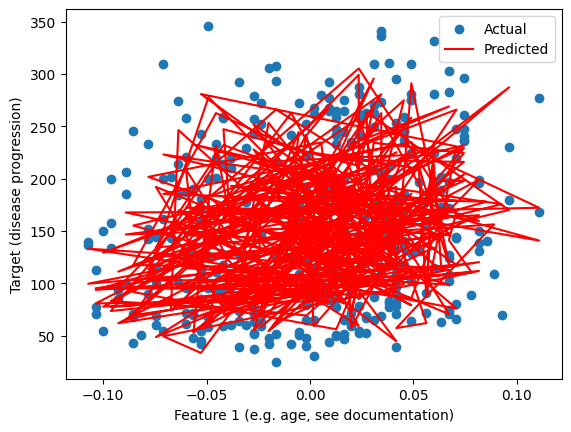

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], y_train, label="Actual")  # Use the first feature (column 0)
plt.plot(X_train[:, 0], predict(X_train, w, b), color='red', label="Predicted")
plt.xlabel("Feature 1 (e.g. age, see documentation)")
plt.ylabel("Target (disease progression)")
plt.legend()
plt.show()
